<div align="center">
    <img src="./imgs/相关系数图.jpg" alt="" title="这是图片的标题" width="300">
    <p>用seaborn库实现如上的相关系数图绘制</p>
</div>


<div align="center">
    <img src="./imgs/相关系数图_复刻版.png" alt="" title="这是图片的标题" width="300">
    <p>最终效果图</p>
</div>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# 1 随机生成基础数据

- 一共7个字段："Eco_S", "Soc_S", "Env_S", "HQ", "WY", "CS", "SC"

- 为每个字段生成100个数据，生成方式可以自行选择（纯随机、正态分布等等）

    - 纯随机：np.random.rand()

    - 正态分布：np.random.normal()

In [2]:
head_list: list[str] = ["Eco_S", "Soc_S", "Env_S", "HQ", "WY", "CS", "SC"]

data_dict: dict[str:np.ndarray] = {f"{head}": np.random.rand(100) for head in head_list}

data_df = pd.DataFrame(data_dict)

data_df.head(5)

,Eco_S,Soc_S,Env_S,HQ,WY,CS,SC
0,0.990757,0.664915,0.668601,0.203001,0.933558,0.065697,0.547914
1,0.875812,0.087684,0.064320,0.306505,0.458591,0.091767,0.473834
2,0.264342,0.614855,0.836041,0.134738,0.420133,0.026483,0.197248
3,0.711771,0.442422,0.724610,0.974020,0.751755,0.990391,0.338234
4,0.332728,0.521881,0.278758,0.797403,0.354113,0.597489,0.950632


# 2 绘制思路

- sns.pairplot的使用参考 https://seaborn.org.cn/generated/seaborn.pairplot.html

- 绘制思路

    - 先绘制一个空白的 pairplot

    - 在下三角区绘制散点图，对角线区绘制核密度图，上三角区显示相关系数

- 为什么不直接一步到位，用sns.pairplot直接完成？

    - pairplot中的 `corner` 参数控制是否绘制上三角区图形，True（不绘制），False（绘制）。如果设置corner=True，上三角区无法绘制任何标记，即使是文字也不行。【示例2.1】

    - 既然如此，corner设置为False不就好了。如果就这样不做任何处理，上三角区会默认绘制图像，与我们需要的相关系数文字重叠。【示例2.2】

## 2.1 示例 corner=True

- 注：`PairGrid.map_upper()` 为绘制上三角区方法，绘制下三角使用 `PairGrid.map_lower()`

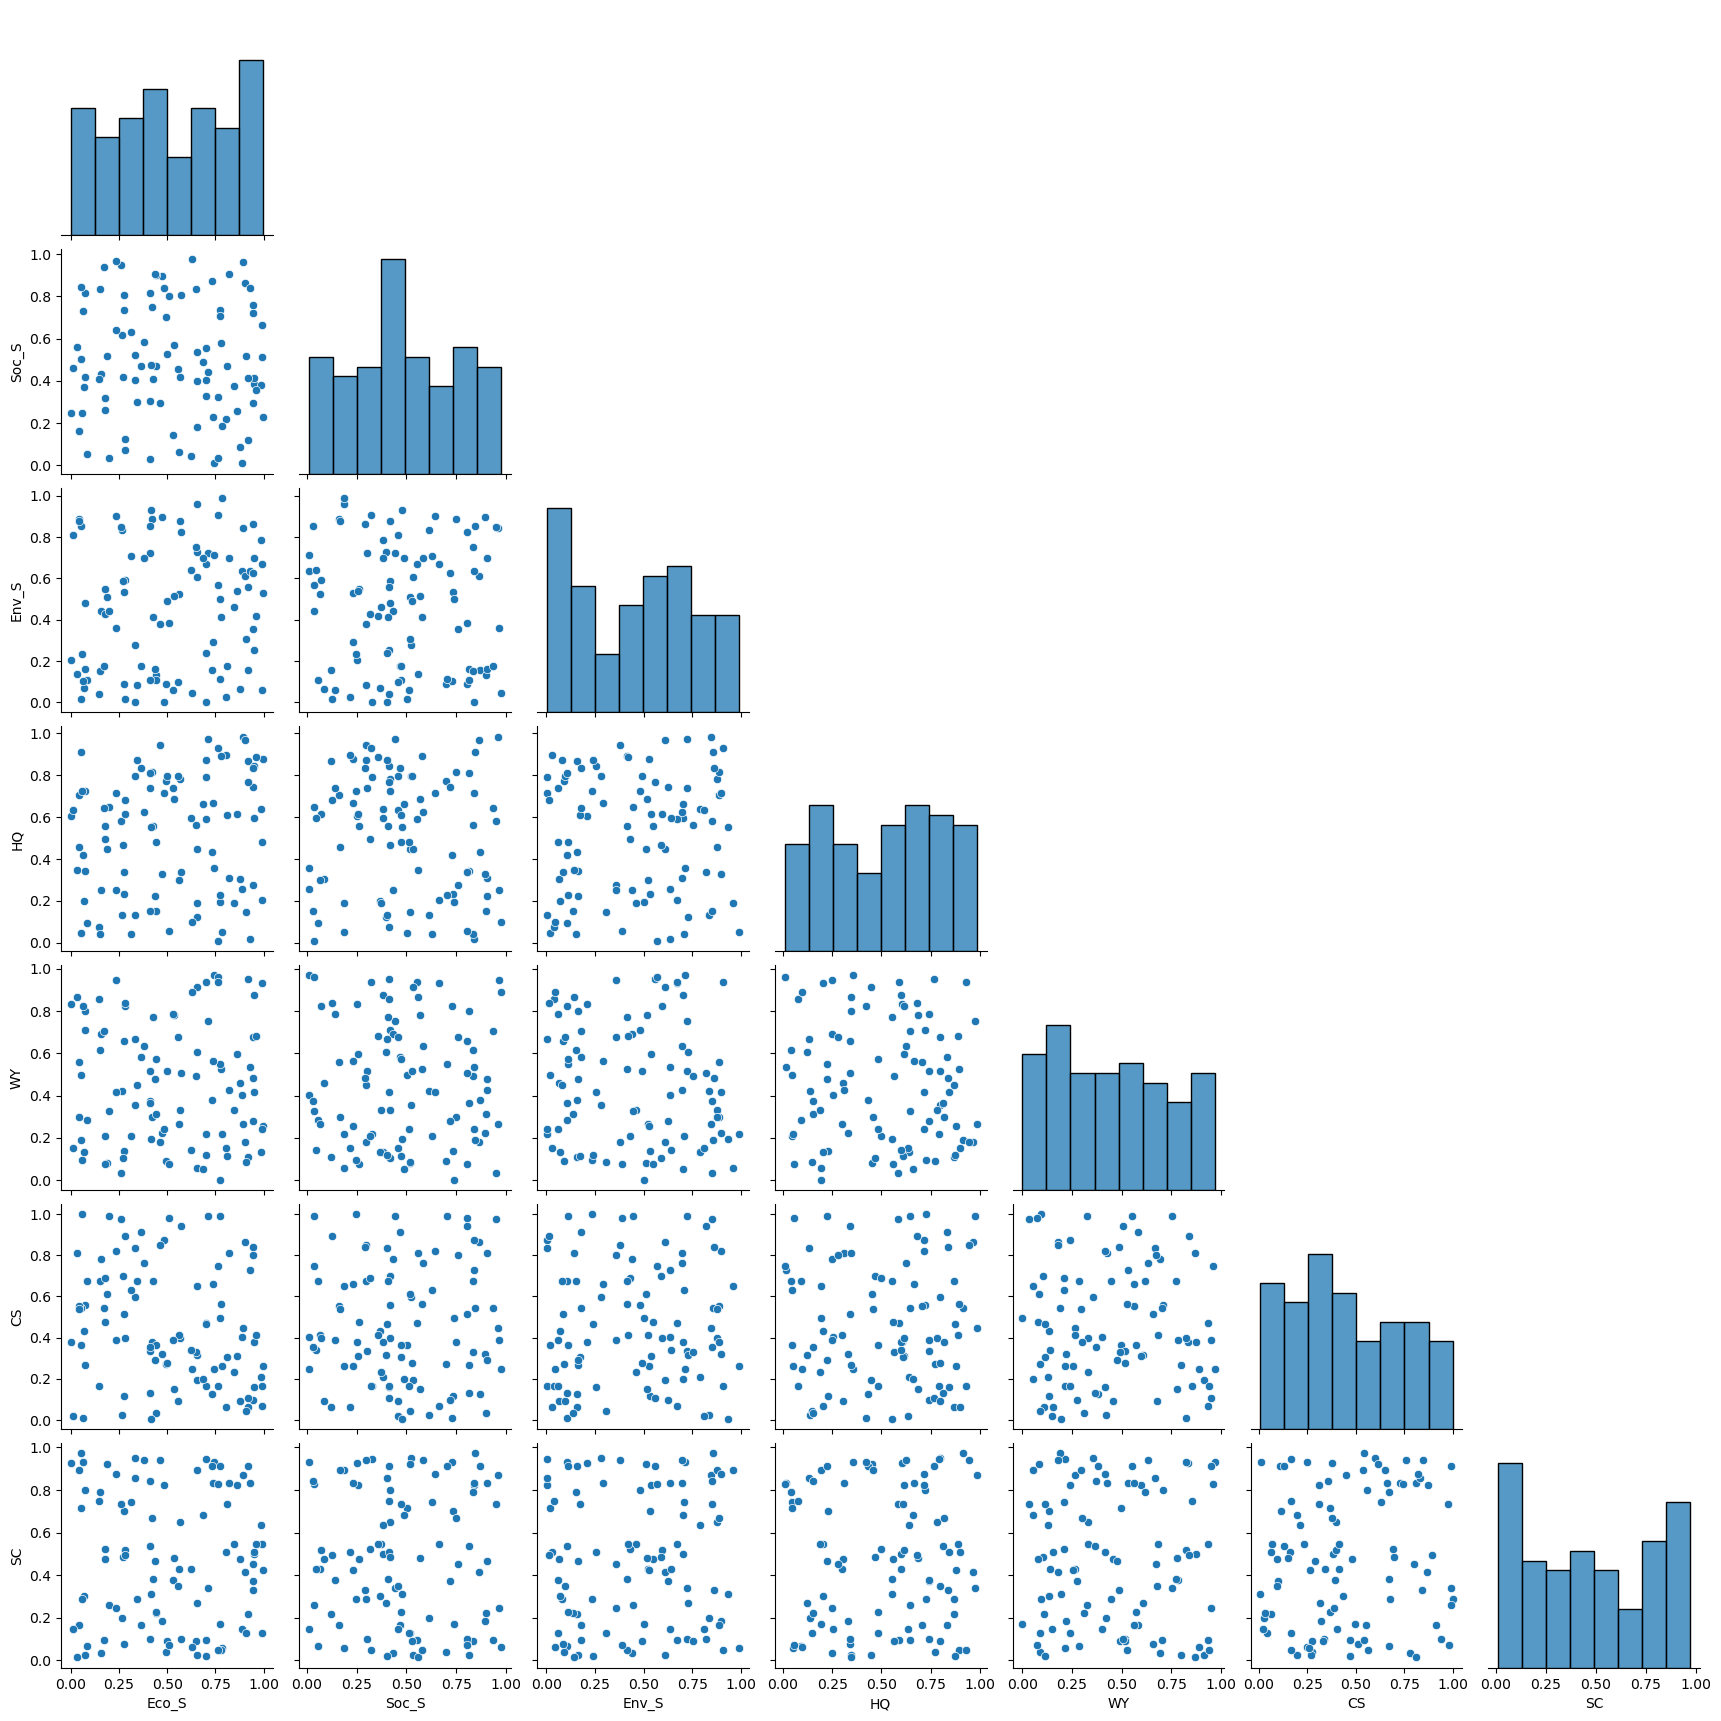

In [3]:
graph: sns.PairGrid = sns.pairplot(data_df, corner=True)

graph.map_upper(sns.scatterplot) # corner=True会直接跳过绘制上三角区

plt.show()


## 2.2 示例 不加其他处理

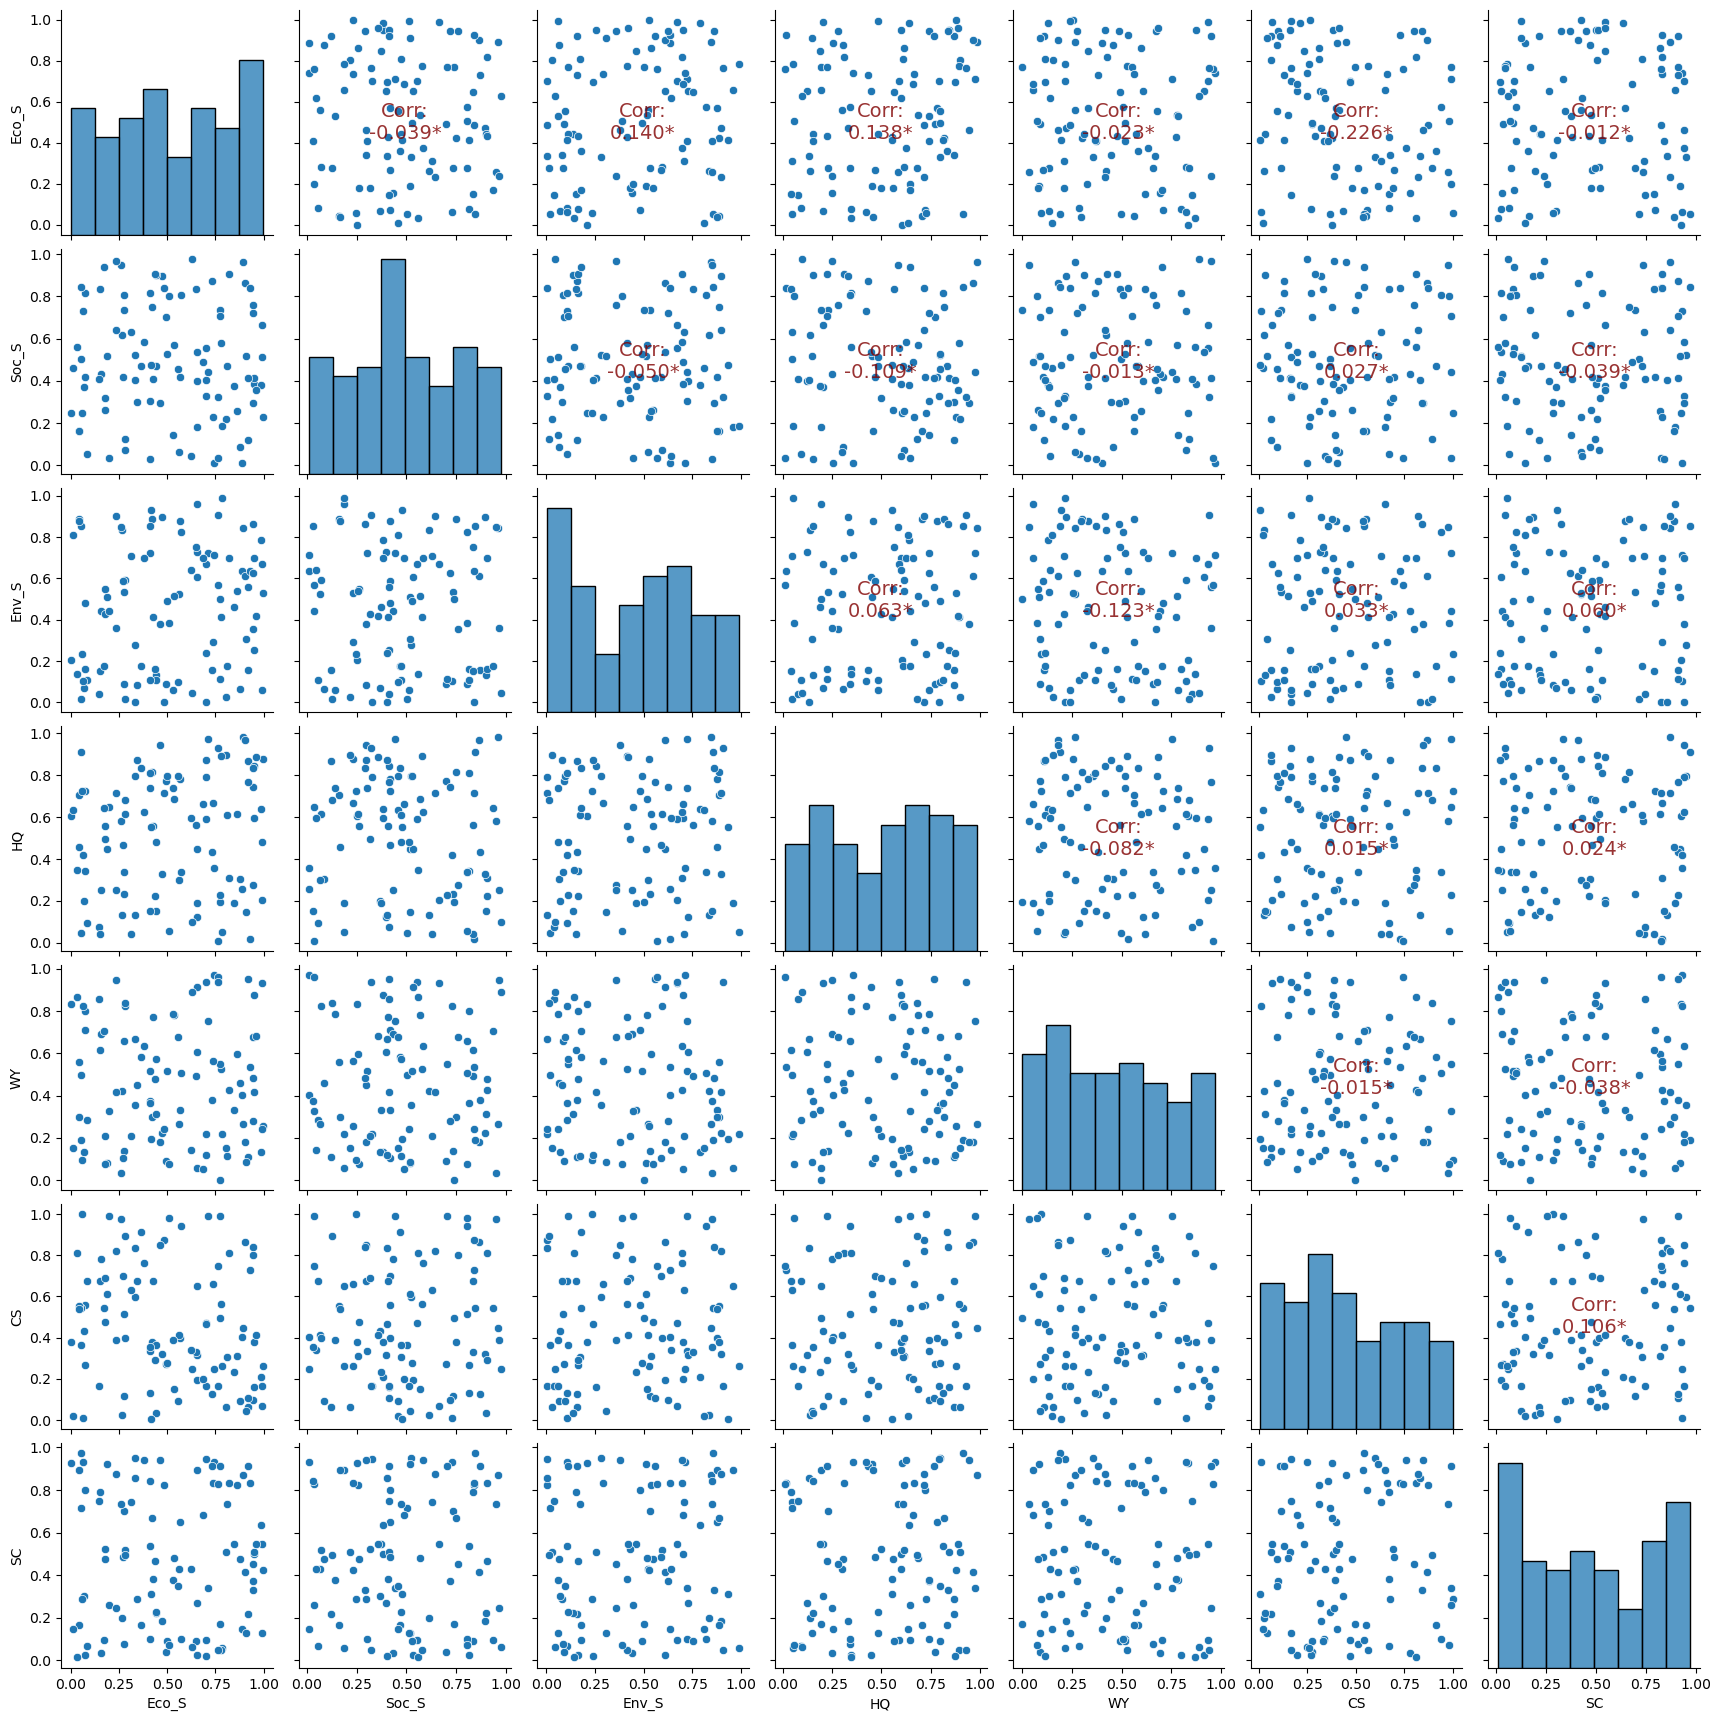

In [4]:
def corrfunc(x: pd.Series, y: pd.Series, **kws):
    """计算相关系数，并添加到图片中

    Parameters
    ----------
    x : pd.Series
        _description_
    y : pd.Series
        _description_
    """
    corrr: np.float64 = np.corrcoef(x, y)[0, 1]  
    ax = plt.gca()  # Get Current Axes
    ax.annotate(
        f"Corr:\n{corrr:.3f}*",
        xy=(0.5, 0.5),
        xycoords="axes fraction",
        ha="center",
        va="center",
        fontsize=14,
        color=(0.5, 0, 0),
        alpha=0.8,
    )


graph: sns.PairGrid = sns.pairplot(data_df, corner=False)

graph.map_upper(corrfunc) 

plt.show()


## 2.3 绘制空白的 `pairplot`

- 根据以上示例，主要注意corner与plot_kws中alpha参数的设置

- 其他外观性的设置可以根据自己需求来

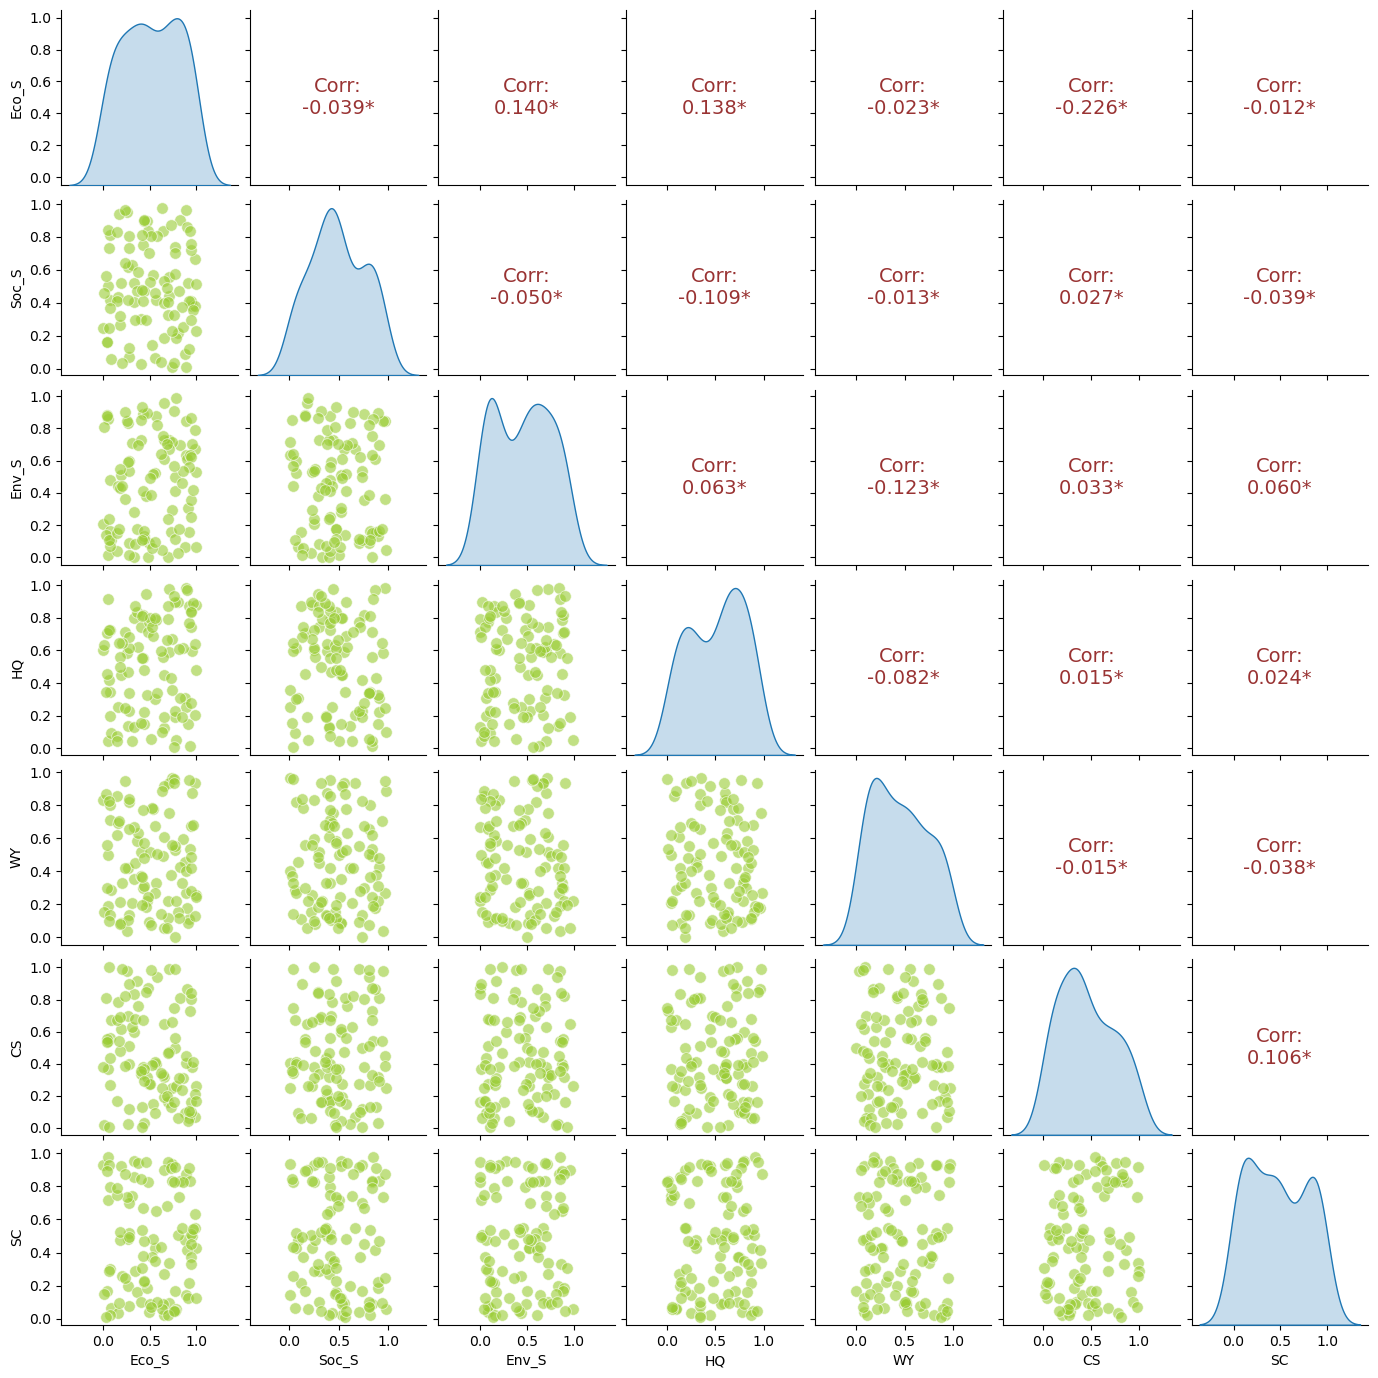

In [5]:
graph: sns.PairGrid = sns.pairplot(
    data_df,
    kind="scatter",
    diag_kind="kde",
    corner=False,  # 上三角不展示图，但展示文字，同样需要绘制
    height=2,
    aspect=1,
    plot_kws={"alpha": 0},  # 设置为透明
)

graph.map_upper(corrfunc) 
graph.map_lower(sns.scatterplot, marker="o", alpha=0.6, color=(0.6, 0.8, 0.2), s=70) 

plt.show()


# 3 标签、刻度线、内网格与外轮廓

- 对比2.3的结果与原图，差异在于标签、刻度线、内网格与外轮廓

- sns.pairplot 并没有提供直接修改这几项的参数，所以我们只能通过遍历各个图，然后改变坐标轴轴参数来曲线救国。

    - 标签：跟上三角区处理类似，既然不能取消，那就隐藏，这里我们通过设置为空来实现。而顶部的子图设置上标签，右侧的子图设置右标签，就好像"移动"了标签一样。注意最后还要调整布局，避免标签被遮挡。

    - 刻度线：左侧子图需要左刻度和刻度标签，底部子图需要底刻度和刻度标签，底部刻度标签还需要倾斜，避免重叠

    - 内网格：上三角显示系数，不需要网格，只在下三角与对角线显示，颜色的话不需要太显眼，设置为浅灰色。

    - 外轮廓：所有子图都要有。

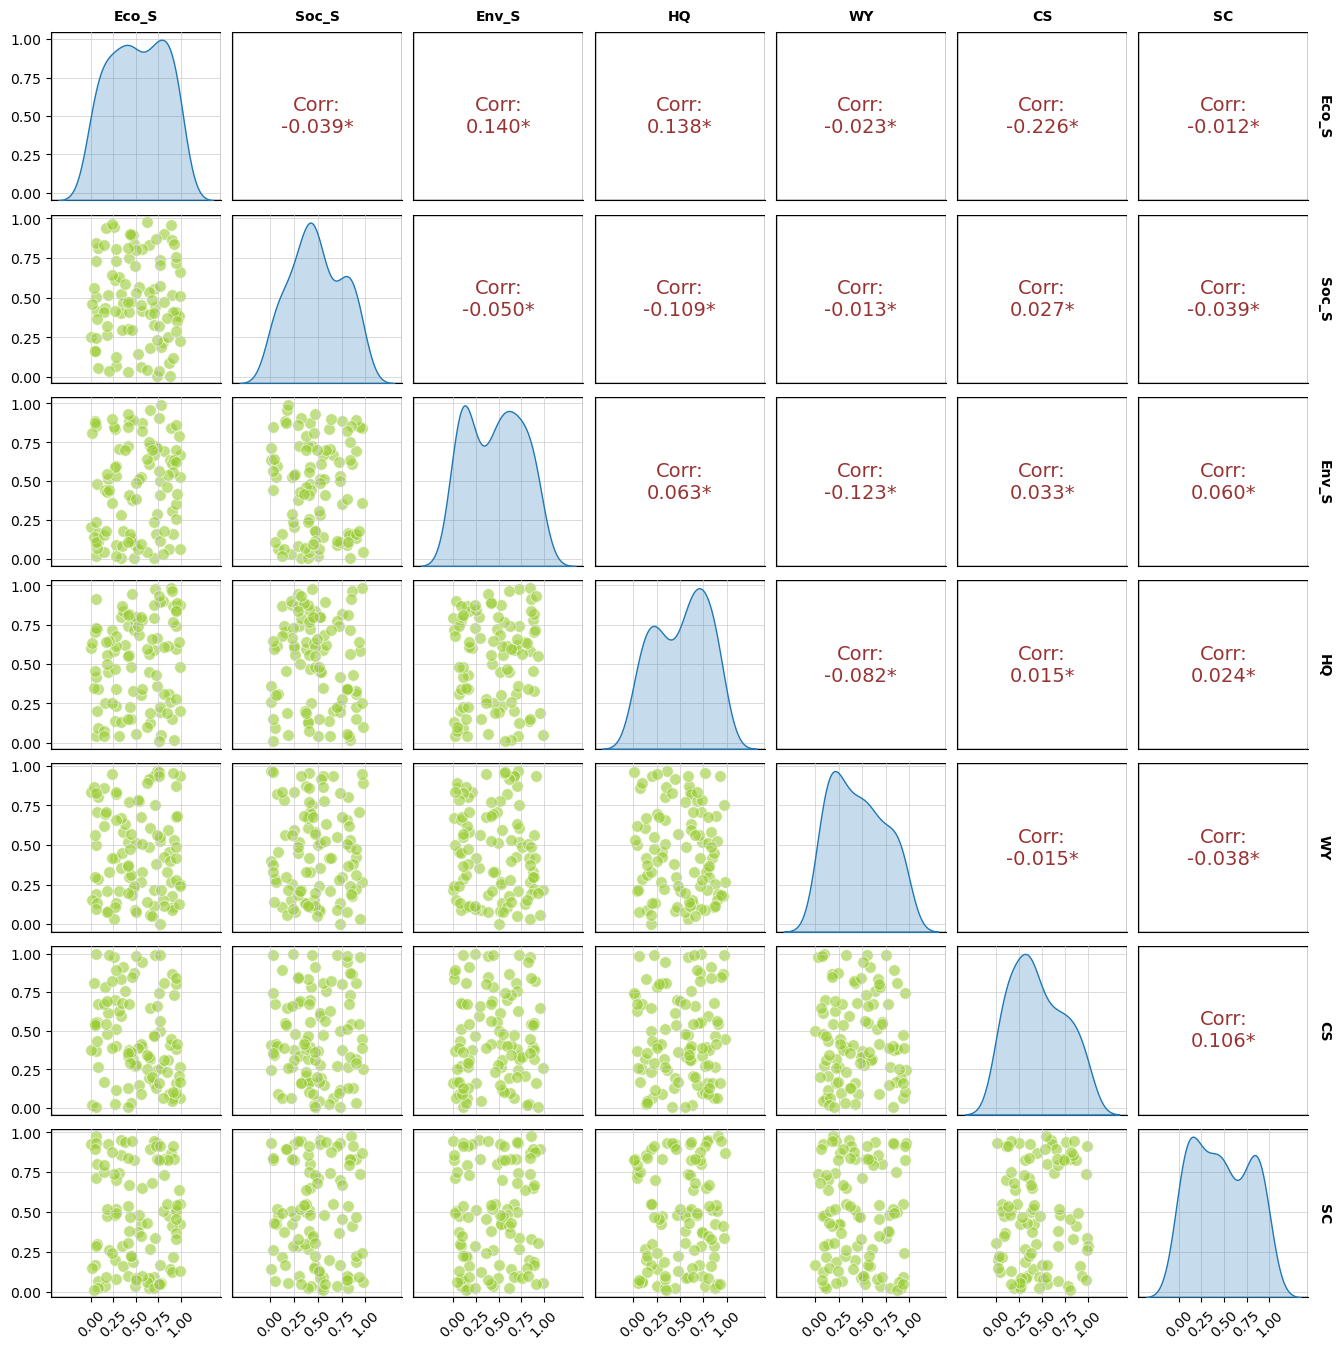

In [ ]:
graph: sns.PairGrid = sns.pairplot(
    data_df,
    kind="scatter",
    diag_kind="kde",
    corner=False,  # 上三角不展示图，但展示文字，同样需要绘制
    height=2,
    aspect=1,
    plot_kws={"alpha": 0},  # 设置为透明
)

graph.map_upper(corrfunc)
graph.map_lower(sns.scatterplot, marker="o", alpha=0.6, color=(0.6, 0.8, 0.2), s=70)

# ////////////////////////

col_num = len(data_df.columns)

for i, ax in enumerate(graph.axes.flat):
    if ax is not None:
        # 标签
        ax.set_xlabel("")
        ax.set_ylabel("")
        if i < col_num:  # 顶部
            ax.annotate(
                data_df.columns[i],
                xy=(0.5, 1.05),
                xycoords="axes fraction",
                ha="center",
                va="bottom",
                fontsize=10,
                fontweight="bold",
                rotation=0,
            )
        if i % col_num == col_num - 1:  # 右侧
            ax.annotate(
                data_df.columns[i // col_num],
                xy=(1.05, 0.5),
                xycoords="axes fraction",
                ha="left",
                va="center",
                fontsize=10,
                fontweight="bold",
                rotation=270,
            )

        # 刻度线
        if i % col_num != 0 and i // col_num != col_num - 1:  # 非左侧非底部 删所有
            ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        elif i % col_num == 0 and i // col_num != col_num - 1:  # 左侧非底部 删底刻度
            ax.tick_params(left=True, bottom=False, labelleft=True, labelbottom=False)
        elif i % col_num != 0 and i // col_num == col_num - 1:  # 非左侧但底部 删左刻度
            ax.tick_params(left=False, bottom=True, labelleft=False, labelbottom=True)
        if i // col_num == col_num - 1:  # 底部 设置刻度倾斜 避免重叠
            for label in ax.get_xticklabels():
                label.set_rotation(45)

        # 内网格
        if i % col_num <= i // col_num:  # 下三角及对角线
            ax.grid(True, color=(0.8, 0.8, 0.8), linestyle="-", linewidth=0.5)

        # 外轮廓
        rect = Rectangle(
            (0, 0), 1, 1, transform=ax.transAxes, color="black", fill=False, lw=1
        )
        ax.add_patch(rect)

        
        ax.set_xticks(np.linspace(0, 1, 5))
        ax.set_yticks(np.linspace(0, 1, 5))

plt.subplots_adjust(top=0.95, right=0.95)

plt.show()